### A.1. Importing Necessary Libraries/Packages

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
#from sklearn.metrics import mean_absolute_percentage_error as MAPE
import statsmodels.api as sa
import statsmodels.formula.api as sfa
from statsmodels.tsa.api import ExponentialSmoothing as TES
from statsmodels.tsa.api import SimpleExpSmoothing as SES
from statsmodels.tsa.api import Holt as DES


### A.2.Downloading Stock Data from 2020 to 2022

In [ ]:
RIO=yf.download('RIO.L',start='2020-03-02',end='2022-03-01')
GLC=yf.download('GLEN.L',start='2020-03-02',end='2022-03-01')
FTSE=yf.download('^FTSE',start='2020-03-02',end='2022-03-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### A.3. Computing Daily Return

In [ ]:
RIO

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,3791.0,3894.500000,3616.080078,3720.0,3082.687012,8521398
2020-03-03,3800.0,3935.500000,3748.000000,3821.5,3166.797852,5197745
2020-03-04,3891.0,3998.500000,3851.000000,3929.0,3255.881348,4292458
2020-03-05,3819.5,3819.500000,3611.000000,3648.5,3166.463379,4832843
2020-03-06,3549.0,3616.500000,3505.000000,3505.0,3041.922363,6867254
...,...,...,...,...,...,...
2022-02-22,5601.0,5774.000000,5566.000000,5691.0,5228.437988,2893757
2022-02-23,5622.0,5740.000000,5558.000000,5568.0,5115.435547,5703210
2022-02-24,5451.0,5586.311035,5385.000000,5467.0,5022.644043,4378442


In [ ]:
GLC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,200.000000,201.399994,187.880005,193.320007,150.551483,52241026
2020-03-03,195.839996,199.539993,190.660004,191.259995,148.947205,57610960
2020-03-04,193.619995,197.259995,191.740005,193.419998,150.629349,50499013
2020-03-05,194.800003,195.960007,184.800003,186.740005,145.427185,64007532
2020-03-06,180.740005,183.520004,173.759995,174.059998,135.552383,56556927
...,...,...,...,...,...,...
2022-02-22,409.000000,425.250000,405.700012,422.200012,386.039703,66731174
2022-02-23,425.000000,431.399994,423.850006,427.350006,390.748627,71608572
2022-02-24,411.049988,429.399994,409.000000,422.250000,386.085419,83846139


In [ ]:
FTSE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,6580.600098,6775.200195,6496.000000,6654.899902,6654.899902,1770844200
2020-03-03,6654.899902,6846.299805,6654.899902,6718.200195,6718.200195,1277190200
2020-03-04,6718.200195,6856.299805,6700.200195,6815.600098,6815.600098,1115783100
2020-03-05,6815.600098,6834.100098,6662.600098,6705.399902,6705.399902,1146893100
2020-03-06,6705.399902,6705.399902,6431.399902,6462.600098,6462.600098,1377953500
...,...,...,...,...,...,...
2022-02-22,7484.299805,7531.299805,7365.000000,7494.200195,7494.200195,1018787100
2022-02-23,7494.200195,7550.000000,7490.500000,7498.200195,7498.200195,862648700
2022-02-24,7498.200195,7498.200195,7204.700195,7207.000000,7207.000000,1966584700


### A.4. Cleaning Date Format Column Index

In [ ]:
RIO.index.difference(GLC.index)

DatetimeIndex(['2021-08-11', '2021-11-17'], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
RIO.index.difference(FTSE.index)

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
FTSE.index.difference(RIO.index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
RIO=RIO.drop(['2020-12-22'])
GLC=GLC.drop(['2020-12-22'])

### Dropping Irrelevant COlumns

In [ ]:
RIO=RIO.drop(columns=['Open','High','Low','Close','Volume'])
GLC=GLC.drop(columns=['Open','High','Low','Close','Volume'])
FTSE=FTSE.drop(columns=['Open','High','Low','Close','Volume'])


### A.5. Train Test Split

In [ ]:
#Calculate the Daily Returns of RIO plc
RIO['Return'] = (RIO['Adj Close'] - RIO['Adj Close'].shift(1)) / RIO['Adj Close'].shift(1)
#Calculate the Daily Returns of GLC plc
GLC['Return'] = (GLC['Adj Close'] - GLC['Adj Close'].shift(1)) / GLC['Adj Close'].shift(1)
#Calculate the Daily Returns of FTSE
FTSE['Return'] = (FTSE['Adj Close'] - FTSE['Adj Close'].shift(1)) / FTSE['Adj Close'].shift(1)

In [ ]:

# Split the data into a training set
RIO_tr=RIO.iloc[0:484]
GLC_tr=GLC.iloc[0:484]
FTSE_tr=FTSE.iloc[0:484]
# and a test set
RIO_te=RIO.iloc[484:504]
GLC_te=GLC.iloc[484:504]
FTSE_te=FTSE.iloc[484:504]

### B

### B.1Computing Returns

Done Above

### B.2 Trend in Prices

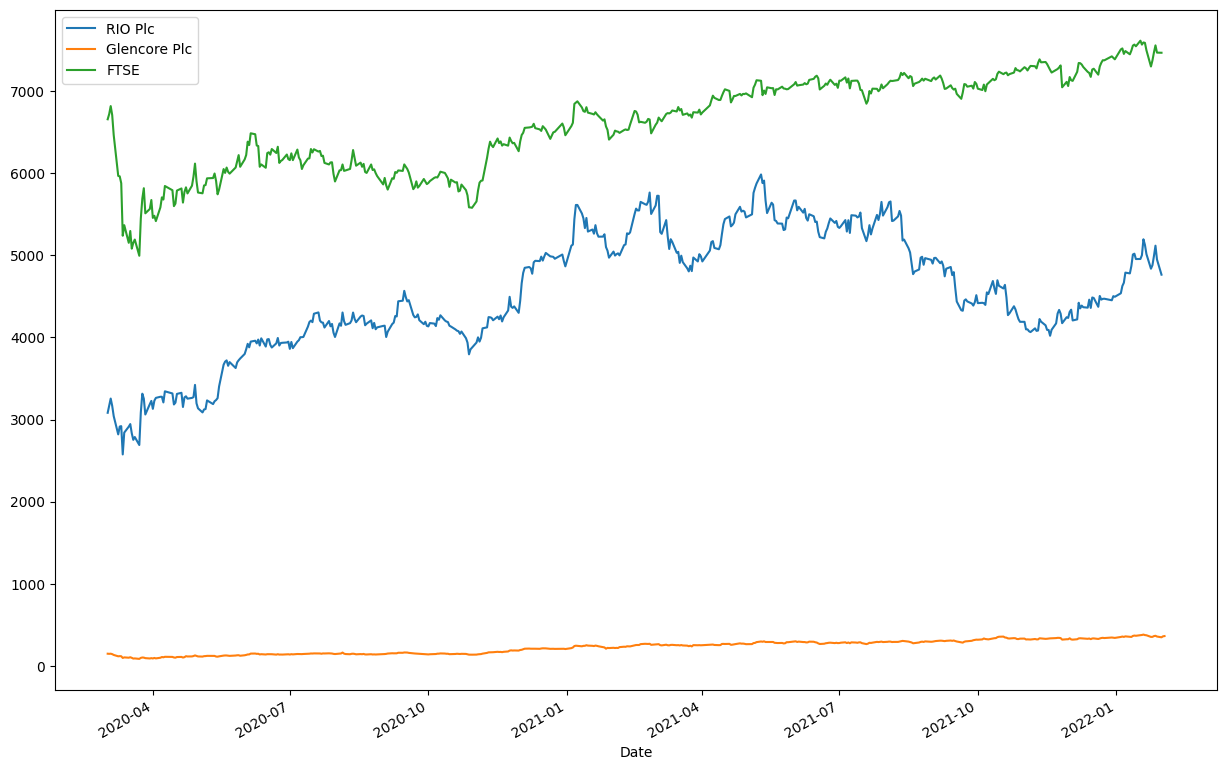

In [ ]:
RIO_tr['Adj Close'].plot(figsize=(15,10), label='RIO Plc')
GLC_tr['Adj Close'].plot(label='Glencore Plc')
FTSE_tr['Adj Close'].plot(label='FTSE')
plt.legend()
plt.show()

In [ ]:
#Scaling a bit
mFTSEtr=pd.DataFrame()
mFTSEtr['m Adj Close']=GLC_tr['Adj Close']*10

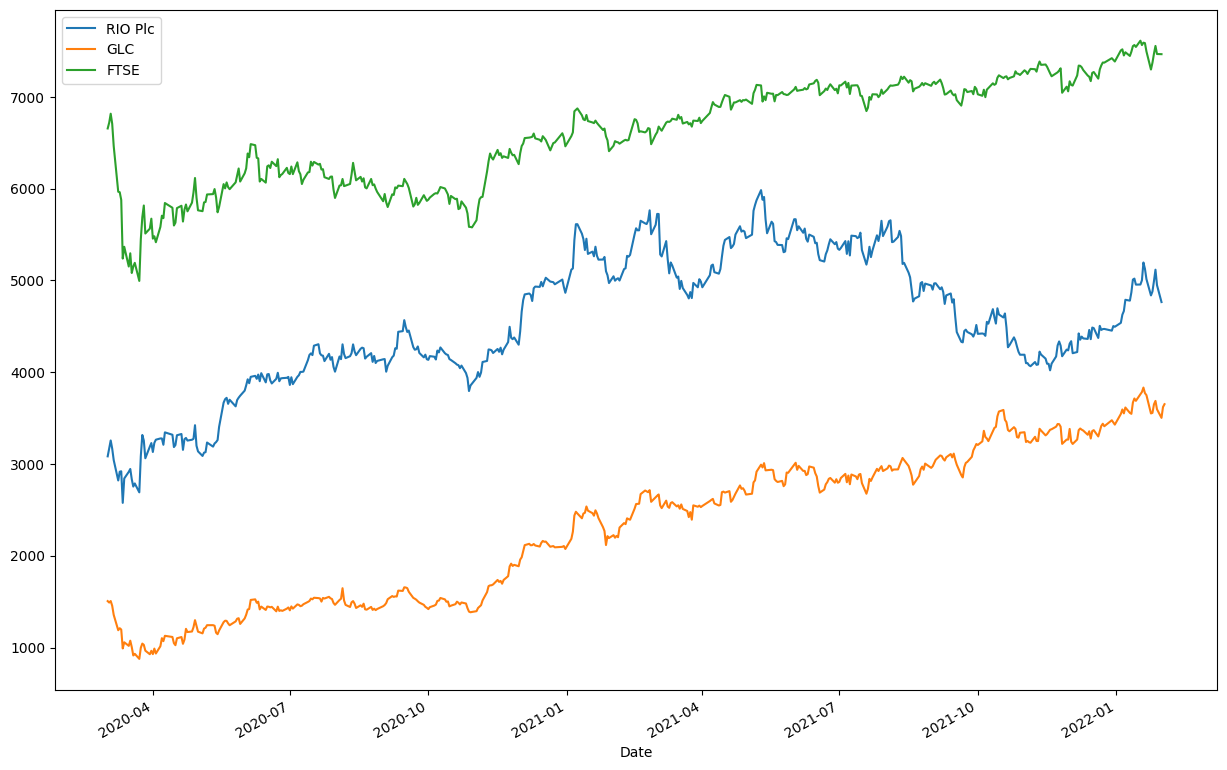

In [ ]:
RIO_tr['Adj Close'].plot(figsize=(15,10), label='RIO Plc')
mFTSEtr['m Adj Close'].plot(label='GLC')
FTSE_tr['Adj Close'].plot(label='FTSE')
plt.legend()
plt.show()

### B.3 Comparing Daily Returns of Three Stocks

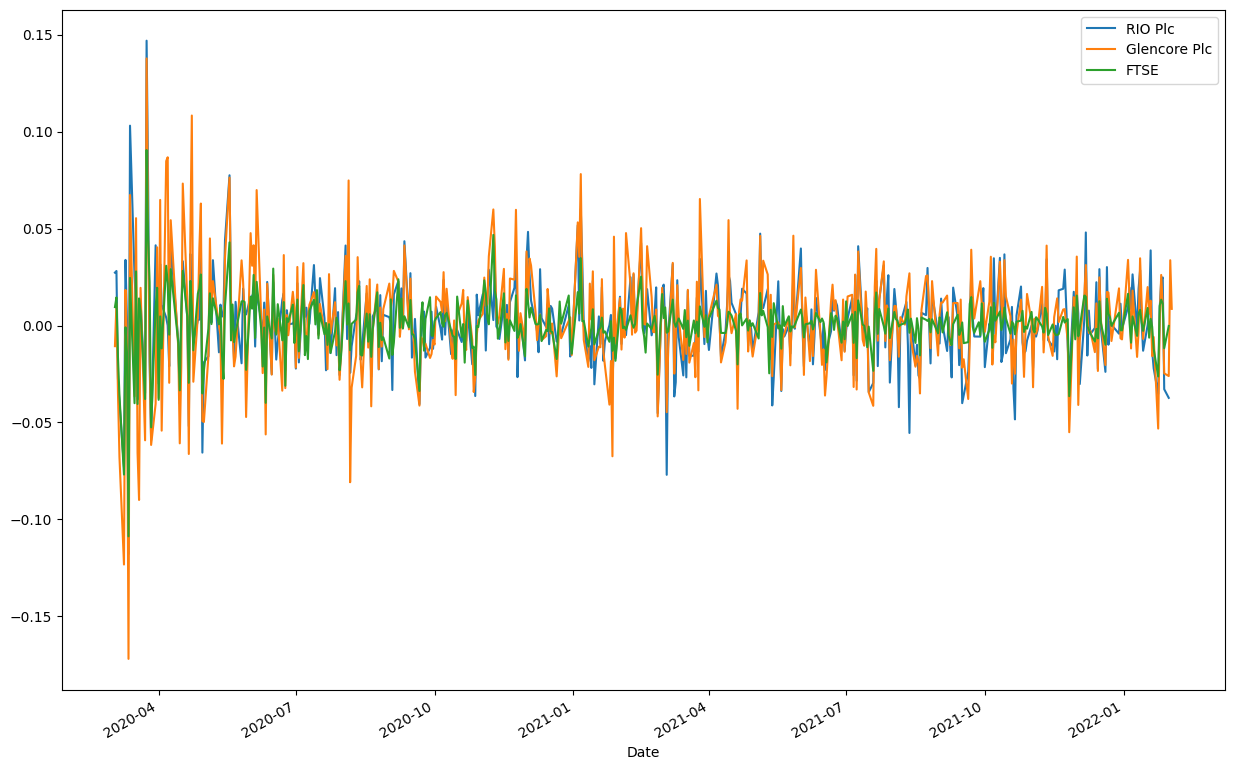

In [ ]:
RIO_tr['Return'].plot(figsize=(15,10), label='RIO Plc')
GLC_tr['Return'].plot(label='Glencore Plc')
FTSE_tr['Return'].plot(label='FTSE')
plt.legend()
plt.show()

In [ ]:
#### Daily Return of RIO Plc Training Set

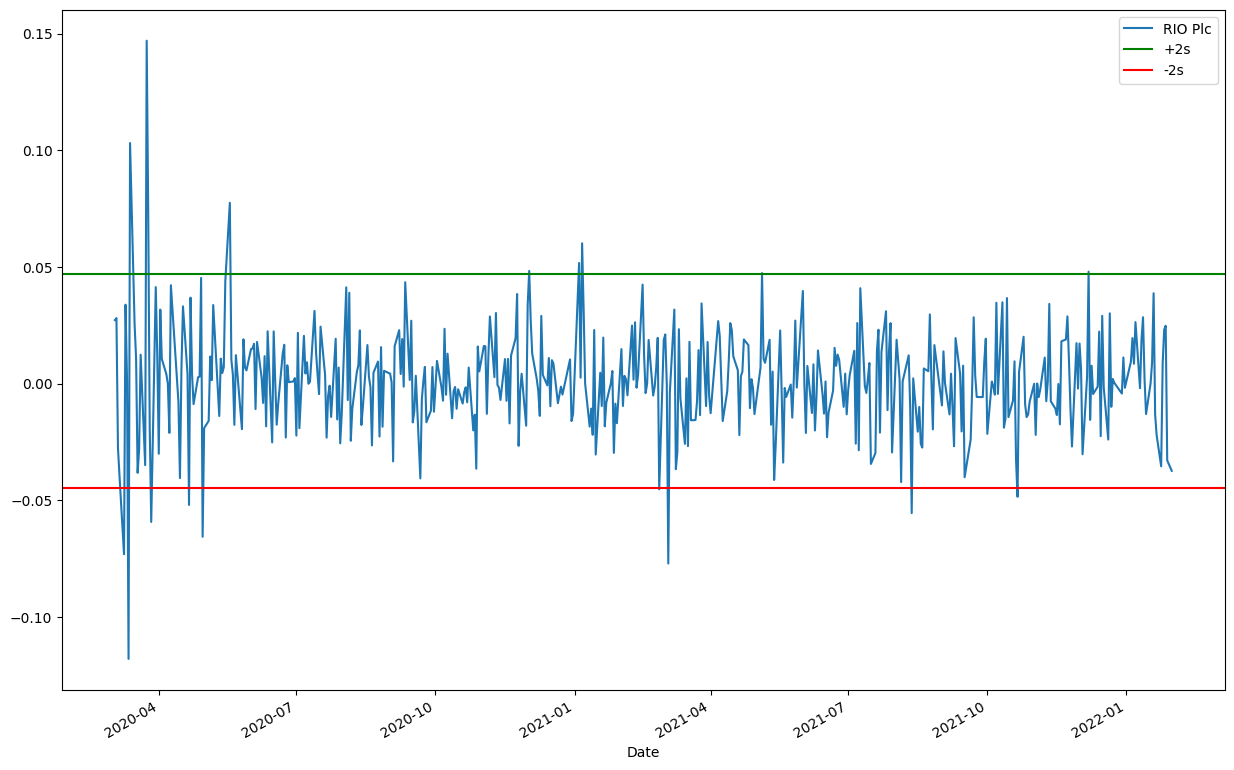

In [ ]:
RIO_tr['Return'].plot(figsize=(15,10), label='RIO Plc')
plt.axhline(y=RIO_tr['Return'].mean()+2*RIO_tr['Return'].std(),label='+2s',color='g')
plt.axhline(y=RIO_tr['Return'].mean()-2*RIO_tr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

### B.5 Risk Assessment

In [ ]:
#identify returns that exceed a certain level, indicating higher risk.

In [ ]:
pss=RIO_tr['Return'].mean()+2*RIO_tr['Return'].std()
RIO_tr.loc[RIO_tr['Return']>=pss]

,Adj Close,Return
Date,,
2020-03-13,2841.442139,0.103100
2020-03-24,3085.750488,0.146936
2020-03-25,3315.304688,0.074392
2020-05-18,3667.664307,0.077511
2020-12-02,4659.355469,0.048324
2021-01-04,5116.485840,0.051737
2021-01-06,5438.434570,0.060160
2021-05-05,5758.571289,0.047401
2021-12-07,4421.801270,0.048013


In [ ]:
nss=RIO_tr['Return'].mean()-2*RIO_tr['Return'].std()
RIO_tr.loc[RIO_tr['Return']<=nss]

,Adj Close,Return
Date,,
2020-03-09,2819.744629,-0.073039
2020-03-12,2575.870117,-0.117848
2020-03-27,3061.883545,-0.059200
2020-04-21,3153.445068,-0.051924
2020-04-30,3197.707031,-0.065559
2021-02-26,5502.468262,-0.045216
2021-03-04,5282.285156,-0.077012
2021-08-12,5178.827148,-0.055421
2021-10-21,4271.130859,-0.048409


In [ ]:
# Min Return

In [ ]:
RIO_tr.loc[RIO_tr['Return']==RIO_tr['Return'].min()]

,Adj Close,Return
Date,,
2020-03-12,2575.870117,-0.117848


In [ ]:
RIO_tr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,4543.519808,0.001161
std,739.366568,0.022861
min,2575.870117,-0.117848
25%,4110.554199,-0.012201
50%,4456.246338,0.000998
75%,5181.812988,0.013323
max,5983.234863,0.146936


In [ ]:
GLC_tr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,230.304721,0.002248
std,81.591206,0.028637
min,87.611427,-0.171965
25%,148.283791,-0.011965
50%,248.904770,0.002859
75%,296.005028,0.016534
max,383.205231,0.137778


In [ ]:
FTSE_tr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,6605.004545,0.000340
std,572.234329,0.014275
min,4993.899902,-0.108738
25%,6104.700195,-0.004957
50%,6709.800049,0.000712
75%,7092.175171,0.006969
max,7611.200195,0.090530


# C.

### C.1 Comparing the DAily Returns

In [ ]:
# Visualizing the training set

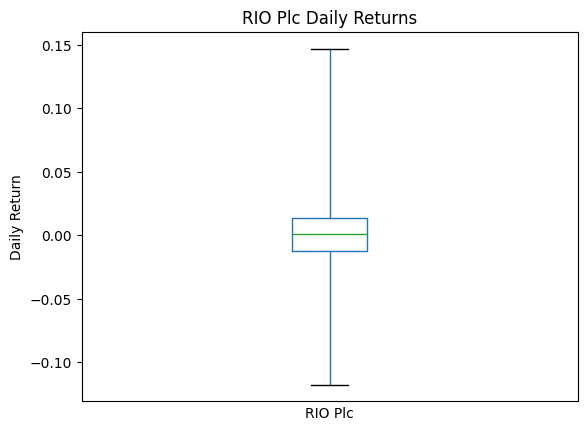

In [ ]:
jdb=RIO_tr.boxplot(column='Return',whis=[0,100],grid=False)
jdb.set_title("RIO Plc Daily Returns",fontsize=12)
jdb.set_xlabel('RIO Plc', fontsize=10)
jdb.set_ylabel('Daily Return', fontsize=10)
jdb.set_xticks([])
plt.show()

In [ ]:
# Creating a Training set of returns

In [ ]:
TrainingReturns=pd.DataFrame({'RIO_Plc':RIO_tr['Return'],'GLC_Plc':GLC_tr['Return'],'FTSE':FTSE_tr['Return']})

In [ ]:
TrainingReturns.head()

,RIO_Plc,GLC_Plc,FTSE
Date,,,
2020-03-02,NaN,NaN,NaN
2020-03-03,0.027285,-0.010656,0.009512
2020-03-04,0.028130,0.011294,0.014498
2020-03-05,-0.027463,-0.034536,-0.016169
2020-03-06,-0.039331,-0.067902,-0.036210


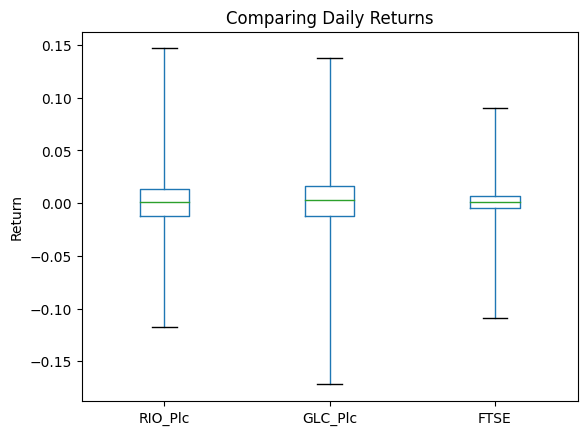

In [ ]:
# visualizing the daily return trend
TrainingReturns.boxplot(whis=[0,100],grid=False)
plt.title('Comparing Daily Returns')
plt.ylabel('Return')
plt.show()

### C.2 Return Distribution

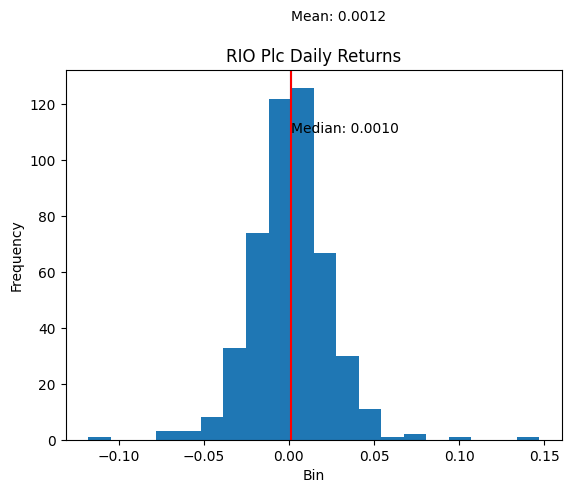

In [ ]:
RIO_tr.hist(column='Return',bins=20,grid=False)
plt.title("RIO Plc Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(RIO_tr['Return'].mean())
plt.text(RIO_tr['Return'].mean()*1.1,150,'Mean: {:,.4f}'.format(RIO_tr['Return'].mean()))

plt.axvline(RIO_tr['Return'].median(),color='r')
plt.text(RIO_tr['Return'].median()*1.2,110,'Median: {:,.4f}'.format(RIO_tr['Return'].median()))

plt.show()

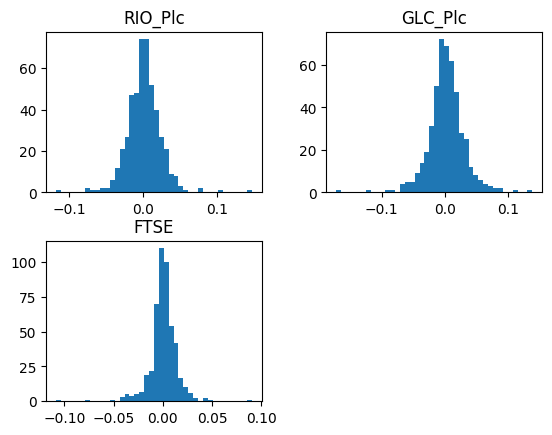

In [ ]:
TrainingReturns.hist(bins=40,grid=False)
plt.show()

### C.3 Daily Stock Prices Comparison

In [ ]:
RIO_tr.columns=['RIO_Price','RIO_Return']
GLC_tr.columns=['GLC_Price','GLC_Return']
FTSE_tr.columns=['FTSE_Price','FTSE_Return']

AllTraining=pd.concat([RIO_tr,GLC_tr,FTSE_tr],axis=1)

In [ ]:
AllTraining.head()

,RIO_Price,RIO_Return,GLC_Price,GLC_Return,FTSE_Price,FTSE_Return
Date,,,,,,
2020-03-02,3082.687256,NaN,150.551483,NaN,6654.899902,NaN
2020-03-03,3166.798096,0.027285,148.947205,-0.010656,6718.200195,0.009512
2020-03-04,3255.880859,0.028130,150.629349,0.011294,6815.600098,0.014498
2020-03-05,3166.463379,-0.027463,145.427185,-0.034536,6705.399902,-0.016169
2020-03-06,3041.922852,-0.039331,135.552399,-0.067902,6462.600098,-0.036210


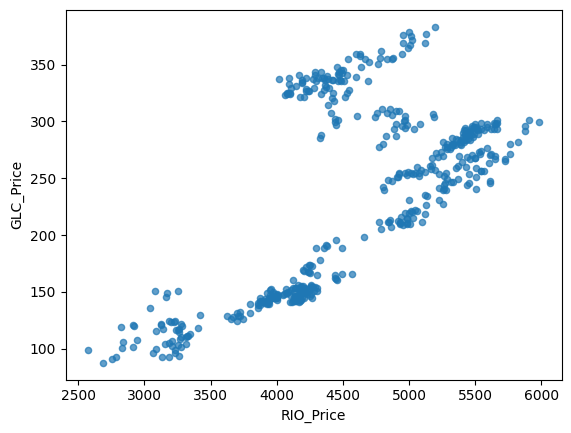

In [ ]:
AllTraining.plot.scatter(x='RIO_Price',y='GLC_Price',alpha=0.7)
plt.show()

In [ ]:
AllTraining.head()

,RIO_Price,RIO_Return,GLC_Price,GLC_Return,FTSE_Price,FTSE_Return
Date,,,,,,
2020-03-02,3082.687256,NaN,150.551483,NaN,6654.899902,NaN
2020-03-03,3166.798096,0.027285,148.947205,-0.010656,6718.200195,0.009512
2020-03-04,3255.880859,0.028130,150.629349,0.011294,6815.600098,0.014498
2020-03-05,3166.463379,-0.027463,145.427185,-0.034536,6705.399902,-0.016169
2020-03-06,3041.922852,-0.039331,135.552399,-0.067902,6462.600098,-0.036210


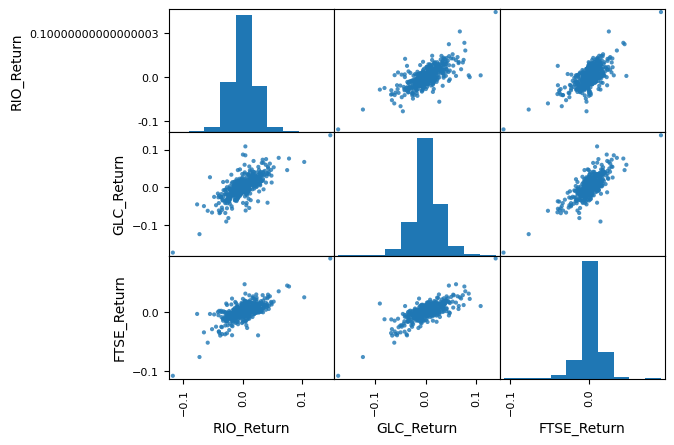

In [ ]:
pd.plotting.scatter_matrix(AllTraining.iloc[:,[1,3,5]], alpha=0.8)
plt.show()

In [ ]:
AllTraining.iloc[:,[1,3,5]].corr(method='pearson')

,RIO_Return,GLC_Return,FTSE_Return
RIO_Return,1.000000,0.730586,0.685839
GLC_Return,0.730586,1.000000,0.767872
FTSE_Return,0.685839,0.767872,1.000000


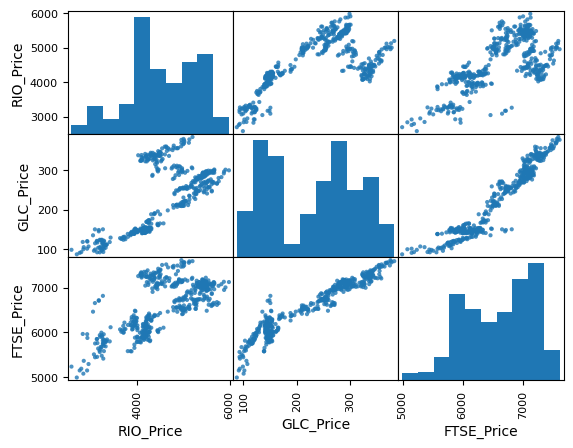

In [ ]:
pd.plotting.scatter_matrix(AllTraining.iloc[:,[0,2,4]], alpha=0.8)
plt.show()

,RIO_Return,GLC_Return,FTSE_Return
RIO_Return,1.000000,0.730586,0.685839
GLC_Return,0.730586,1.000000,0.767872
FTSE_Return,0.685839,0.767872,1.000000


### D

## D.1 Performing Linear Regression

In [ ]:
# performing linear regression using the Ordinary Least Squares (OLS) method to fit a linear model
# relating the 'RIO_Price' variable to  the 'GLC_Price' variable.

In [ ]:
RIO_GLC_reg=sfa.ols('RIO_Price ~ GLC_Price', data=AllTraining).fit()

In [ ]:
print(RIO_GLC_reg.summary())
sa.graphics.plot_fit(RIO_GLC_reg,exog_idx='GLC_Price',vlines=False)
plt.ylabel("RIO Price")
plt.xlabel("GLC Price")
plt.title("RIO vs GLC")
plt.show()

                            OLS Regression Results                            
Dep. Variable:              RIO_Price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     375.6
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           3.08e-62
Time:                        18:44:50   Log-Likelihood:                -3728.1
No. Observations:                 482   AIC:                             7460.
Df Residuals:                     480   BIC:                             7469.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3158.1931     75.759     41.688      0.0

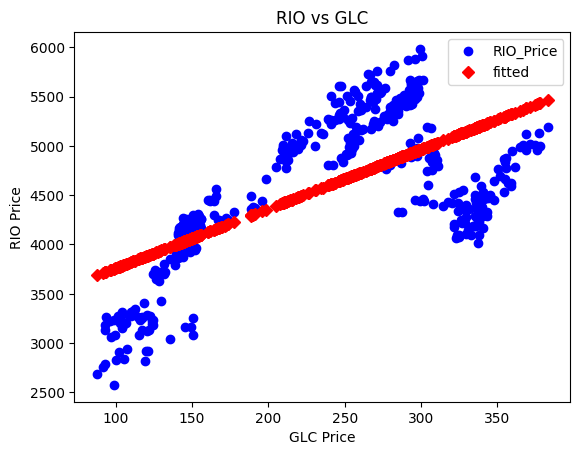

In [ ]:
sa.graphics.plot_fit(RIO_GLC_reg,exog_idx='GLC_Price',vlines=False)
plt.ylabel("RIO Price")
plt.xlabel("GLC Price")
plt.title("RIO vs GLC")
plt.show()

In [ ]:
#performing linear regression using the Ordinary Least Squares (OLS) method to fit a linear model relating the 'RIO_Return' variable
# to the 'FTSE_Return' variable.

In [ ]:
RIO_FTSE_rreg=sfa.ols('RIO_Return ~ FTSE_Return', data=AllTraining).fit()

In [ ]:
print(RIO_FTSE_rreg.summary())

                            OLS Regression Results                            
Dep. Variable:             RIO_Return   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     427.2
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           2.18e-68
Time:                        18:46:26   Log-Likelihood:                 1293.6
No. Observations:                 483   AIC:                            -2583.
Df Residuals:                     481   BIC:                            -2575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0008      0.001      1.038      

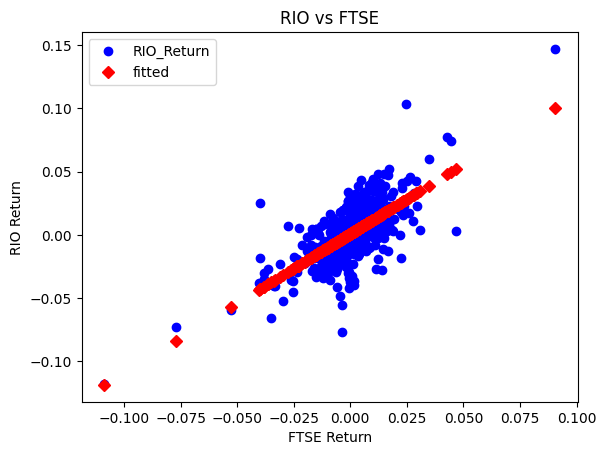

In [ ]:
sa.graphics.plot_fit(RIO_FTSE_rreg,exog_idx='FTSE_Return',vlines=False)
plt.ylabel("RIO Return")
plt.xlabel("FTSE Return")
plt.title("RIO vs FTSE")
plt.show()

In [ ]:
# performing linear regression using the Ordinary Least Squares (OLS) method to fit a linear model relating the 'RIO_Price'
# variable to the 'GLC_Price' and 'FTSE_Price' variables.

In [ ]:
RIO_GLC_FTSE_reg=sfa.ols('RIO_Price ~ GLC_Price + FTSE_Price', data=AllTraining).fit()

In [ ]:
print(RIO_GLC_FTSE_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              RIO_Price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     201.1
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           3.92e-64
Time:                        18:47:35   Log-Likelihood:                -3720.5
No. Observations:                 482   AIC:                             7447.
Df Residuals:                     479   BIC:                             7460.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.7174    789.107      0.101      0.9

# C.6 Moving Average

In [ ]:
ma5=RIO_tr.rolling(5).mean()

In [ ]:
ma20=RIO_tr.rolling(20).mean()

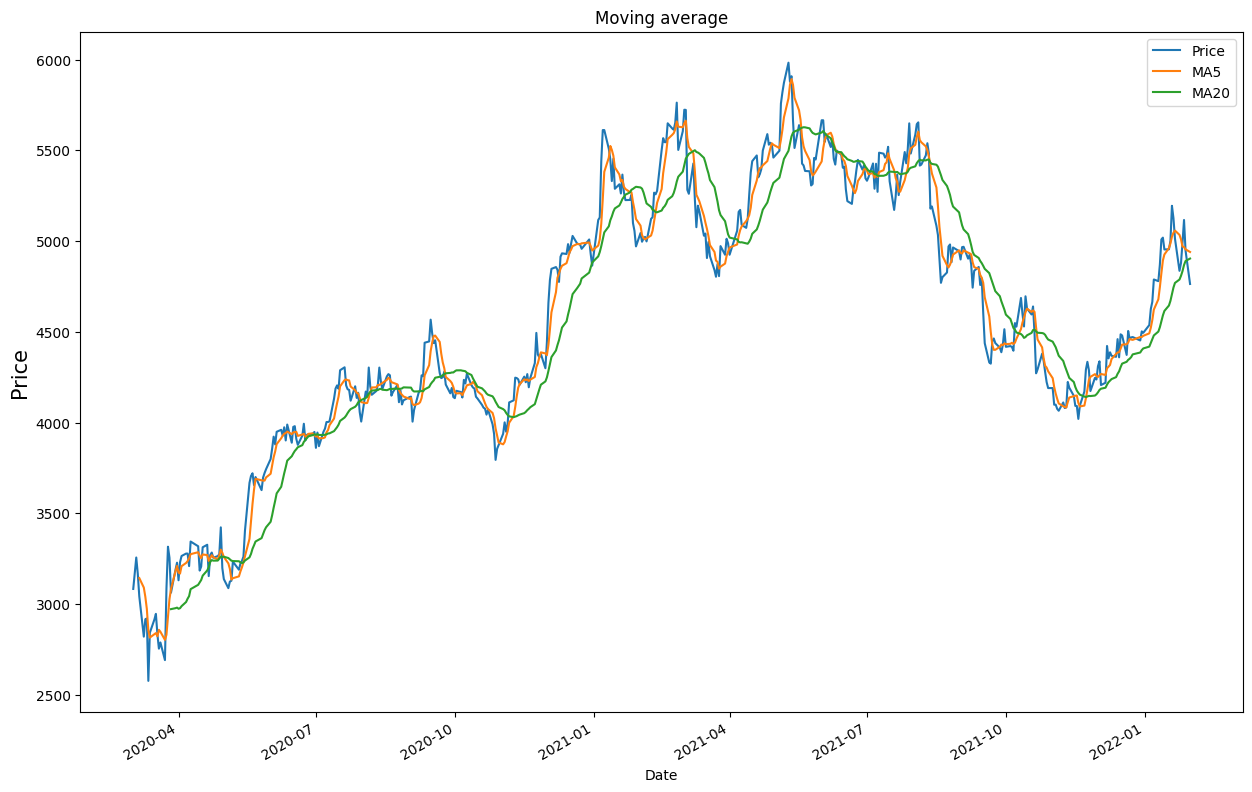

In [ ]:
RIO_tr['RIO_Price'].plot(figsize=(15,10), title= 'Moving average', label='Price')
ma5['RIO_Price'].plot(label='MA5')
ma20['RIO_Price'].plot(label='MA20')
plt.legend()
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
RIOma5fcsts=pd.Series([ma5['RIO_Price'][-1]]*20)
RIOma5fcsts.index=RIO_te.index

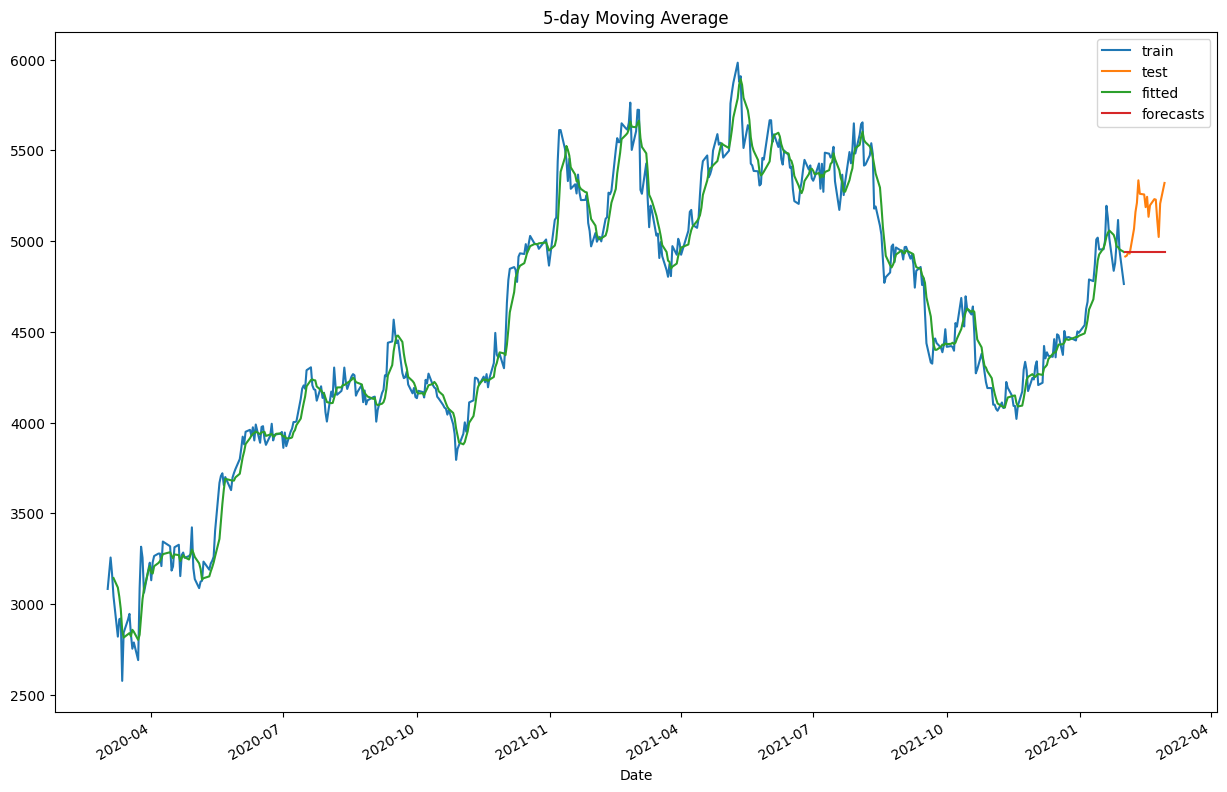

In [ ]:
RIO_tr['RIO_Price'].plot(figsize=(15,10),label='train',title='5-day Moving Average')
RIO_te['Adj Close'].plot(label='test')
ma5['RIO_Price'].plot(label='fitted')
RIOma5fcsts.plot(label='forecasts')
plt.legend()
plt.show()


In [ ]:
MAE(RIO_te['Adj Close'],RIOma5fcsts)

209.7899999999998

In [ ]:
MSE(RIO_te['Adj Close'],RIOma5fcsts)

58872.372991433

In [ ]:
print(
    'MAE: {:,.4f}'.format(MAE(RIO_te['Adj Close'],RIOma5fcsts)),
    '\nMSE: {:,.4f}'.format(MSE(RIO_te['Adj Close'],RIOma5fcsts))
                         )

MAE: 209.7900 
MSE: 58,872.3730


## D.2 Exponential Smootheing

In [ ]:
RIOses=SES(RIO_tr['RIO_Price'],initialization_method="estimated").fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
RIOsesfcsts=RIOses.forecast(20)
RIOsesfcsts.index=RIO_te.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## single exponential smoothening

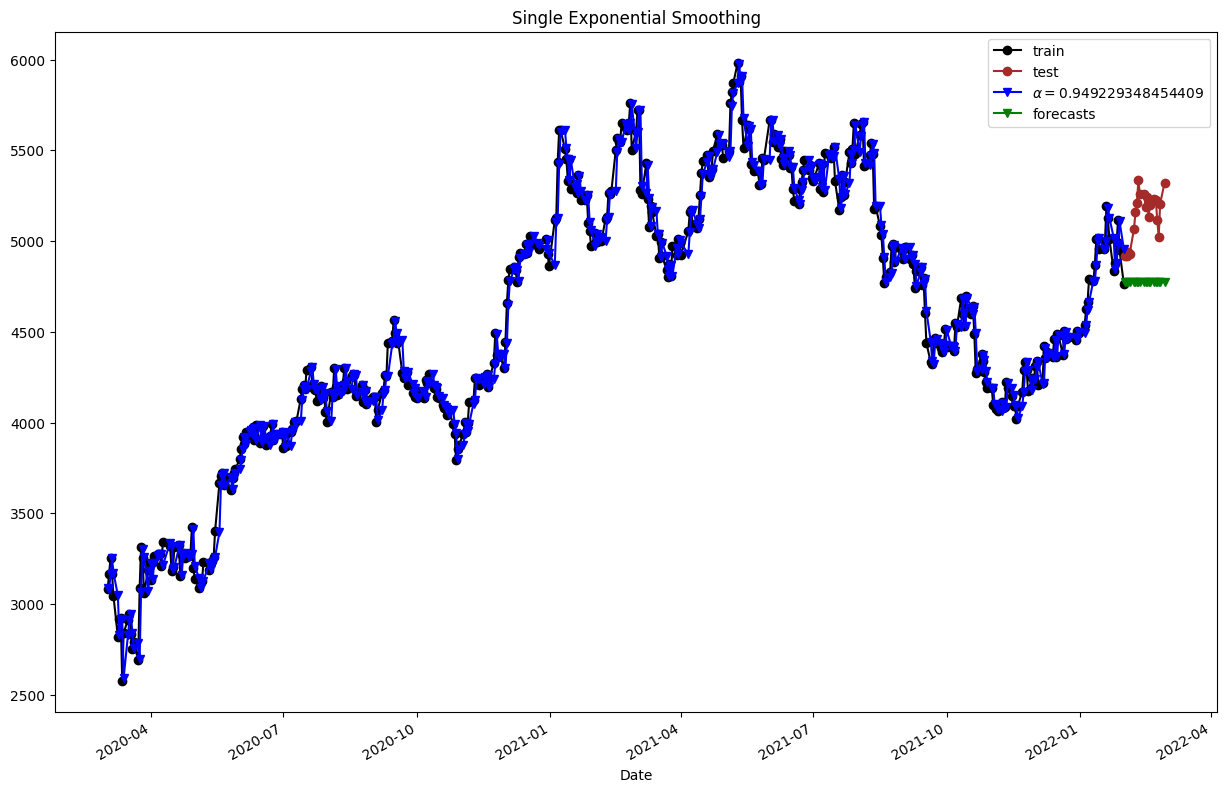

In [ ]:
RIO_tr['RIO_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Single Exponential Smoothing')
RIO_te['Adj Close'].plot(marker='o',color='brown',label='test')
RIOses.fittedvalues.plot(marker='v', color='blue',label=r'$\alpha=%s$'%RIOses.model.params['smoothing_level'])
RIOsesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [ ]:
print(
    'MAE: {:,.4f}'.format(MAE(RIO_te['Adj Close'],RIOsesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(RIO_te['Adj Close'],RIOsesfcsts))
)

MAE: 370.6966 
MSE: 154,633.9899


### Holt's Winters Method (Additive)

In [ ]:
RIOtesa=TES(RIO_tr['RIO_Price'],seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
RIOtesfcstsa=RIOtesa.forecast(20)
RIOtesfcstsa.index=RIO_te.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


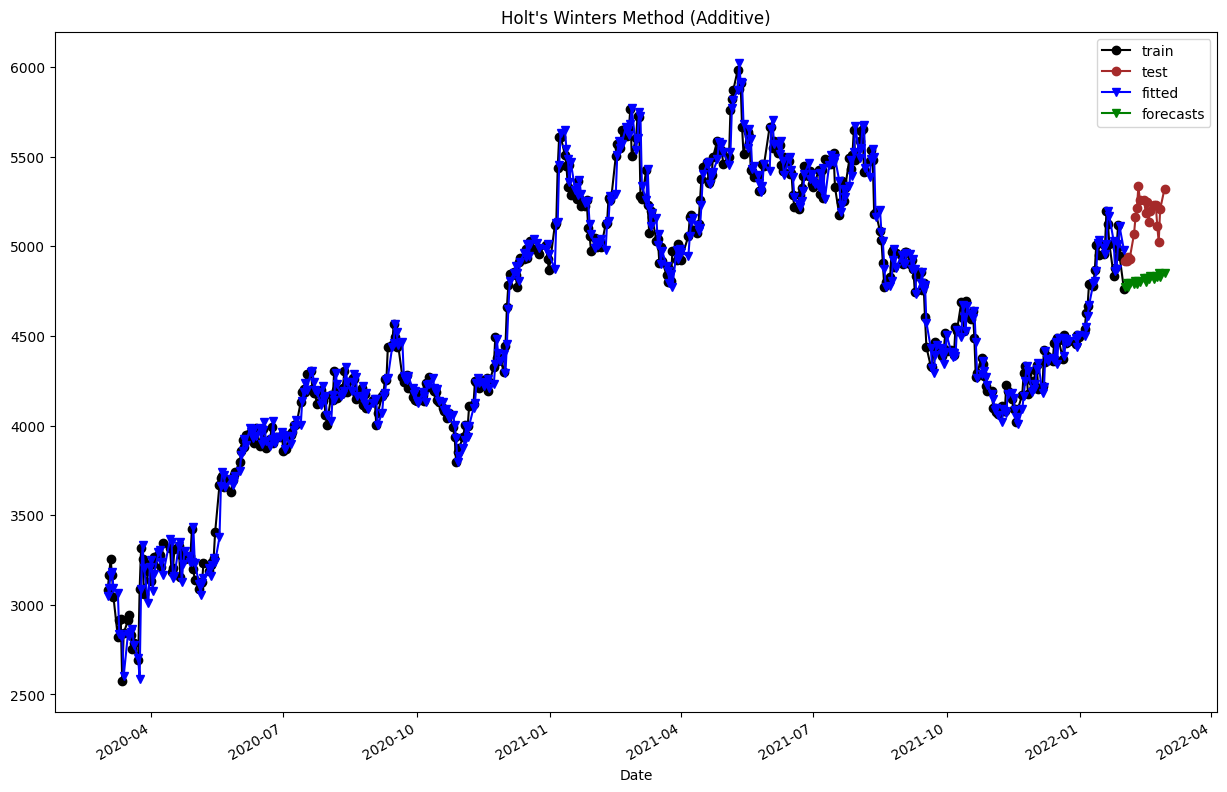

In [ ]:
RIO_tr['RIO_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Additive)")
RIO_te['Adj Close'].plot(marker='o',color='brown',label='test')
RIOtesa.fittedvalues.plot(marker='v', color='blue',label='fitted')
RIOtesfcstsa.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [ ]:
print(
    'MAE: {:,.4f}'.format(MAE(RIO_te['Adj Close'],RIOtesfcstsa)),
    '\nMSE: {:,.4f}'.format(MSE(RIO_te['Adj Close'],RIOtesfcstsa))
)

MAE: 331.8318 
MSE: 124,734.0740


## Holt's Winters Method (Multiplicative)

In [ ]:
RIOtesm=TES(RIO_tr['RIO_Price'],seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
RIOtesfcstsm=RIOtesm.forecast(20)
RIOtesfcstsm.index=RIO_te.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


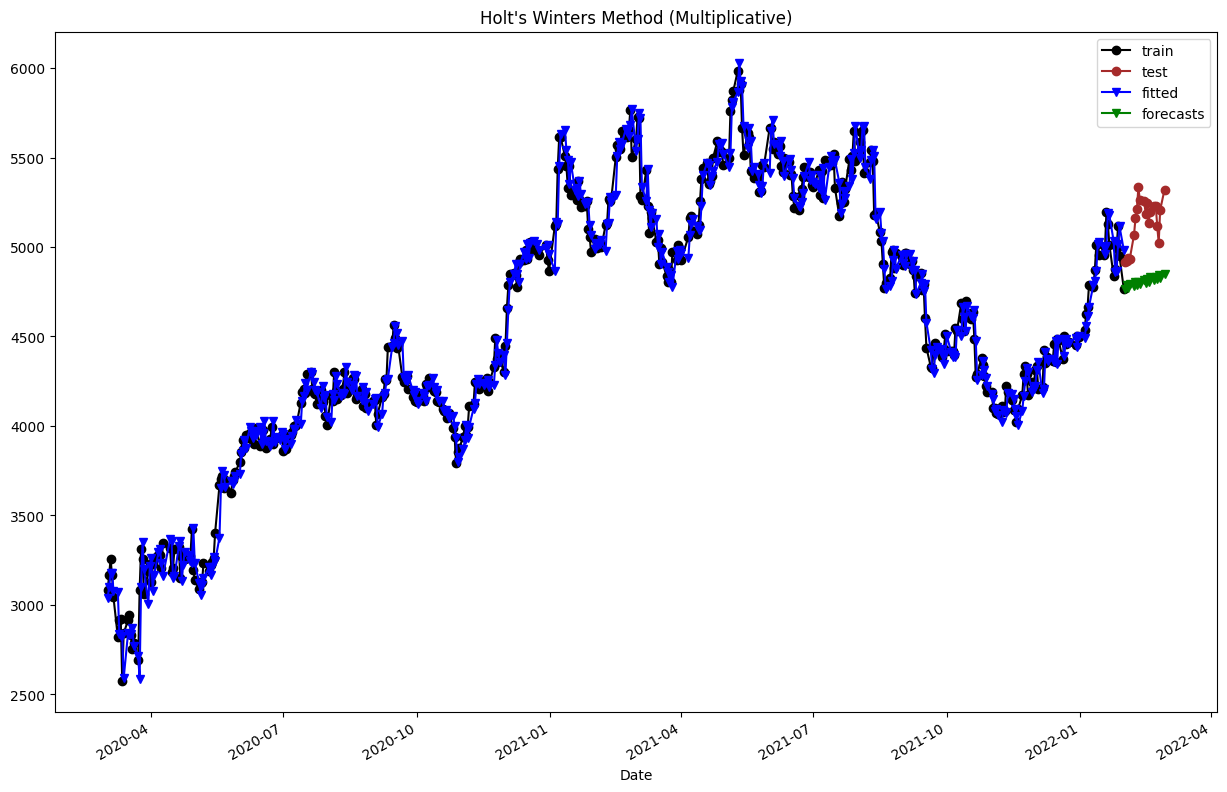

In [ ]:
RIO_tr['RIO_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Multiplicative)")
RIO_te['Adj Close'].plot(marker='o',color='brown',label='test')
RIOtesm.fittedvalues.plot(marker='v', color='blue',label='fitted')
RIOtesfcstsm.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [ ]:
print(
    'MAE: {:,.4f}'.format(MAE(RIO_te['Adj Close'],RIOtesfcstsm)),
    '\nMSE: {:,.4f}'.format(MSE(RIO_te['Adj Close'],RIOtesfcstsm))
)

MAE: 336.3509 
MSE: 127,655.3429
